
Background:
At Santander, mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals. Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as:

is a customer satisfied?
Will a customer buy this product?
Can a customer pay this loan?
Problem Statement:
We need to identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted.

Supervised: The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features
Classification: The label is a binary variable, 0 (will not make a specific transaction in the future), 1 (will make a specific transaction in the future)
Import Packages


In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import stats
import seaborn as sns
import missingno as msno
import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# import the necessary modelling algos.

#classification.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
import lightgbm as lgb

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
import xgboost as xg

#model selection
from sklearn.model_selection import train_test_split,cross_validate,cross_val_score,cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
import hyperopt as hpt
from catboost import cv,Pool

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
from sklearn.metrics import classification_report,roc_auc_score,roc_curve, auc,confusion_matrix


Exploratory Data Analysis (EDA)

1.Data Collection
2.Data Visualization
3.Data Preprocessing

1.Data Collection


In [2]:
os.chdir("C:/Users/HP/Downloads")


In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [4]:
#pfr=pp.ProfileReport(train)
#pfr


In [5]:
# view profile report generated in the saved repository as a html file
#pfr.to_file("profile.html")


In [6]:
print(train.shape)
train.head(5)


(200000, 202)


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [7]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


train contains:
 
 1.ID_code (string)

 2.target
 
 3.200 numerical variables, named from var_0 to var_199


test contains:


1.ID_code (string)

2.200 numerical variables

3.named from var_0 to var_199


In [8]:
print(test.shape)
test.head(5)


(200000, 201)


,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


Data Visualization


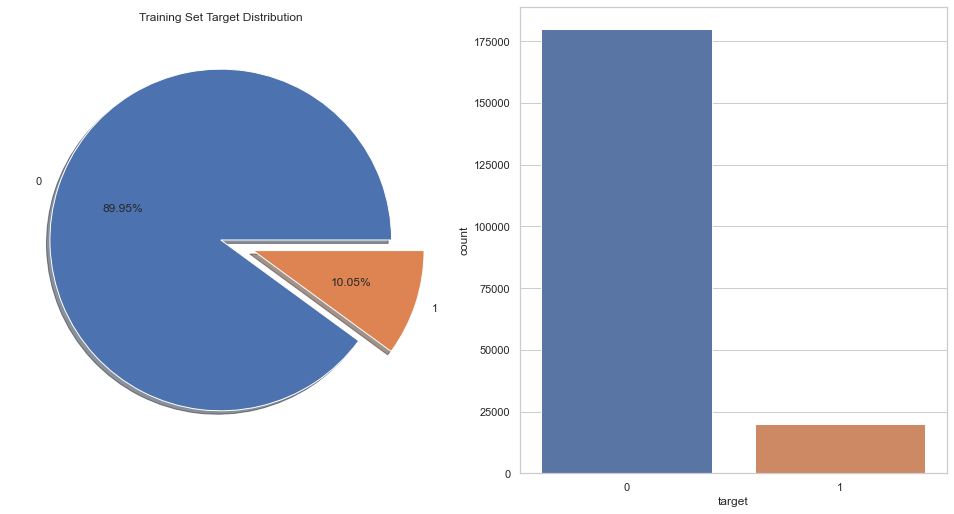

In [9]:
f,ax=plt.subplots(1,2,figsize=(15,8))

train['target'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.2f%%',ax=ax[0],shadow=True)
ax[0].set_title('Training Set Target Distribution')
ax[0].set_ylabel('')
sns.countplot('target',data=train,ax=ax[1])
plt.show()
# The data is unbalanced with respect to target value


In [10]:
# KDE plots of features with respect to target value 0 and 1.

def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,5,figsize=(18,24))

    for feature in features:
        i += 1
        plt.subplot(10,5,i)
        sns.distplot(df1[feature], hist=False,label=label1,kde_kws = {'shade': True, 'linewidth': 2})
        sns.distplot(df2[feature], hist=False,label=label2,kde_kws = {'shade': True, 'linewidth': 2})
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', labelsize=6, pad=-6)
        plt.tick_params(axis='y', labelsize=6)
    plt.show()

    


<Figure size 432x288 with 0 Axes>

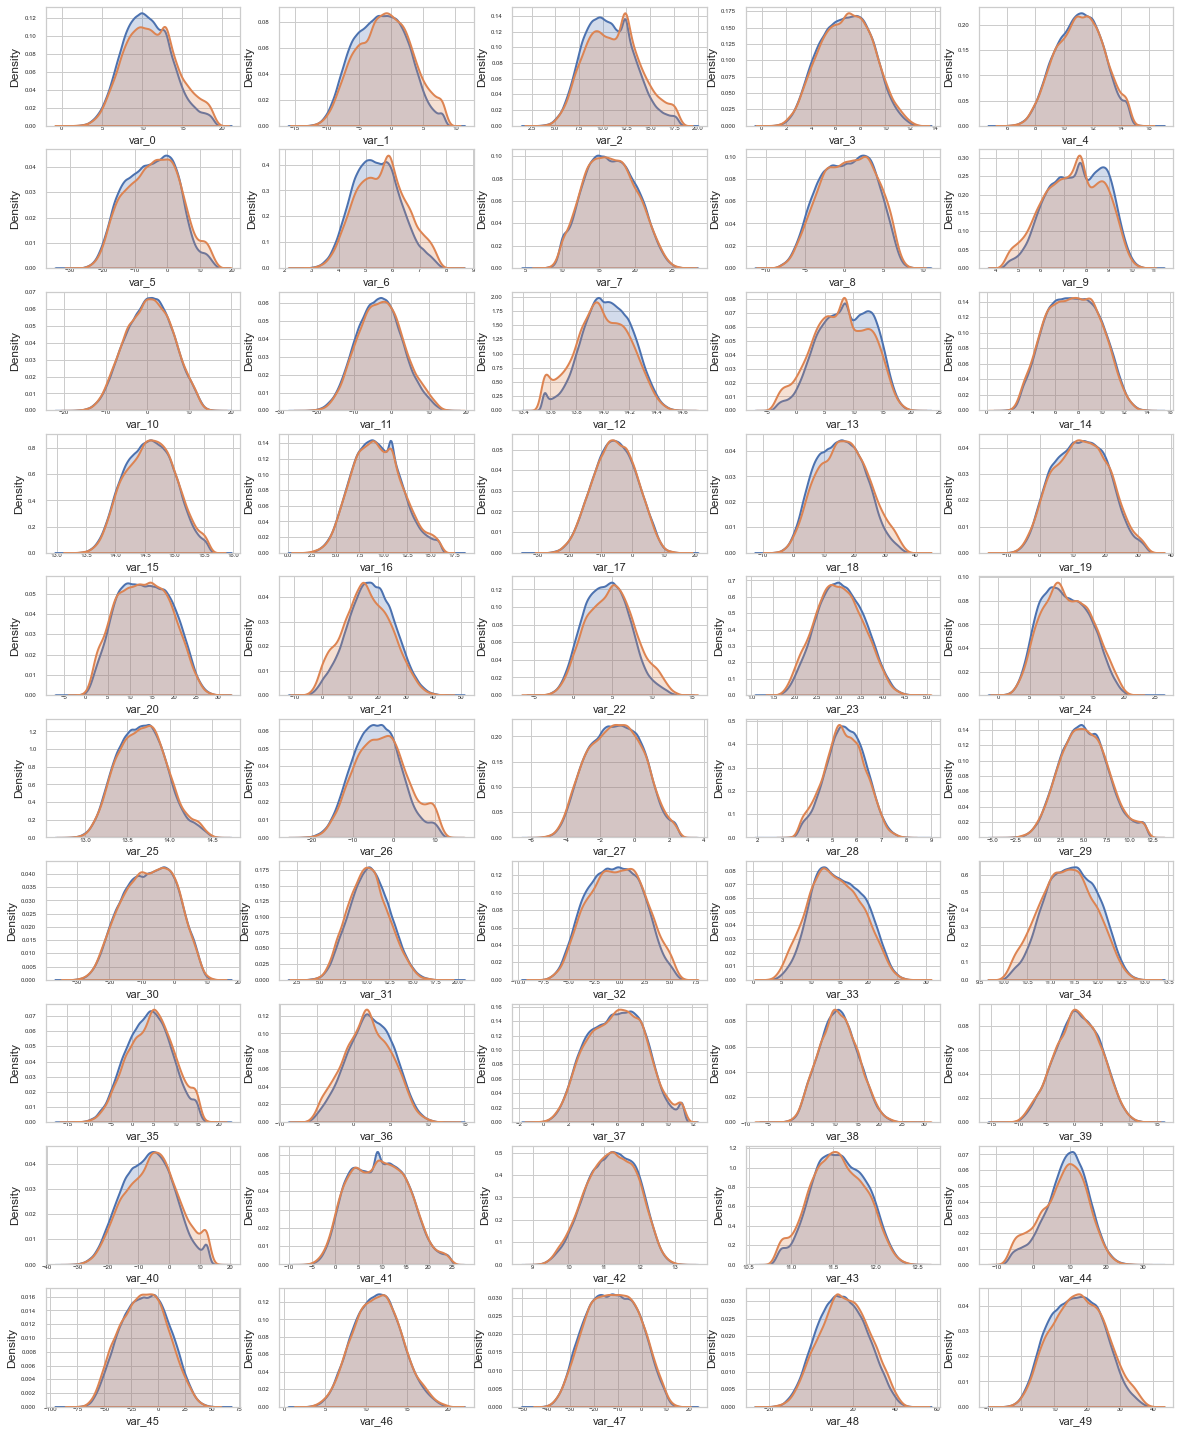

In [11]:
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
features = train.columns.values[2:52]
plot_feature_distribution(t0, t1, '0', '1', features)
#From var_0 to var_49


<Figure size 432x288 with 0 Axes>

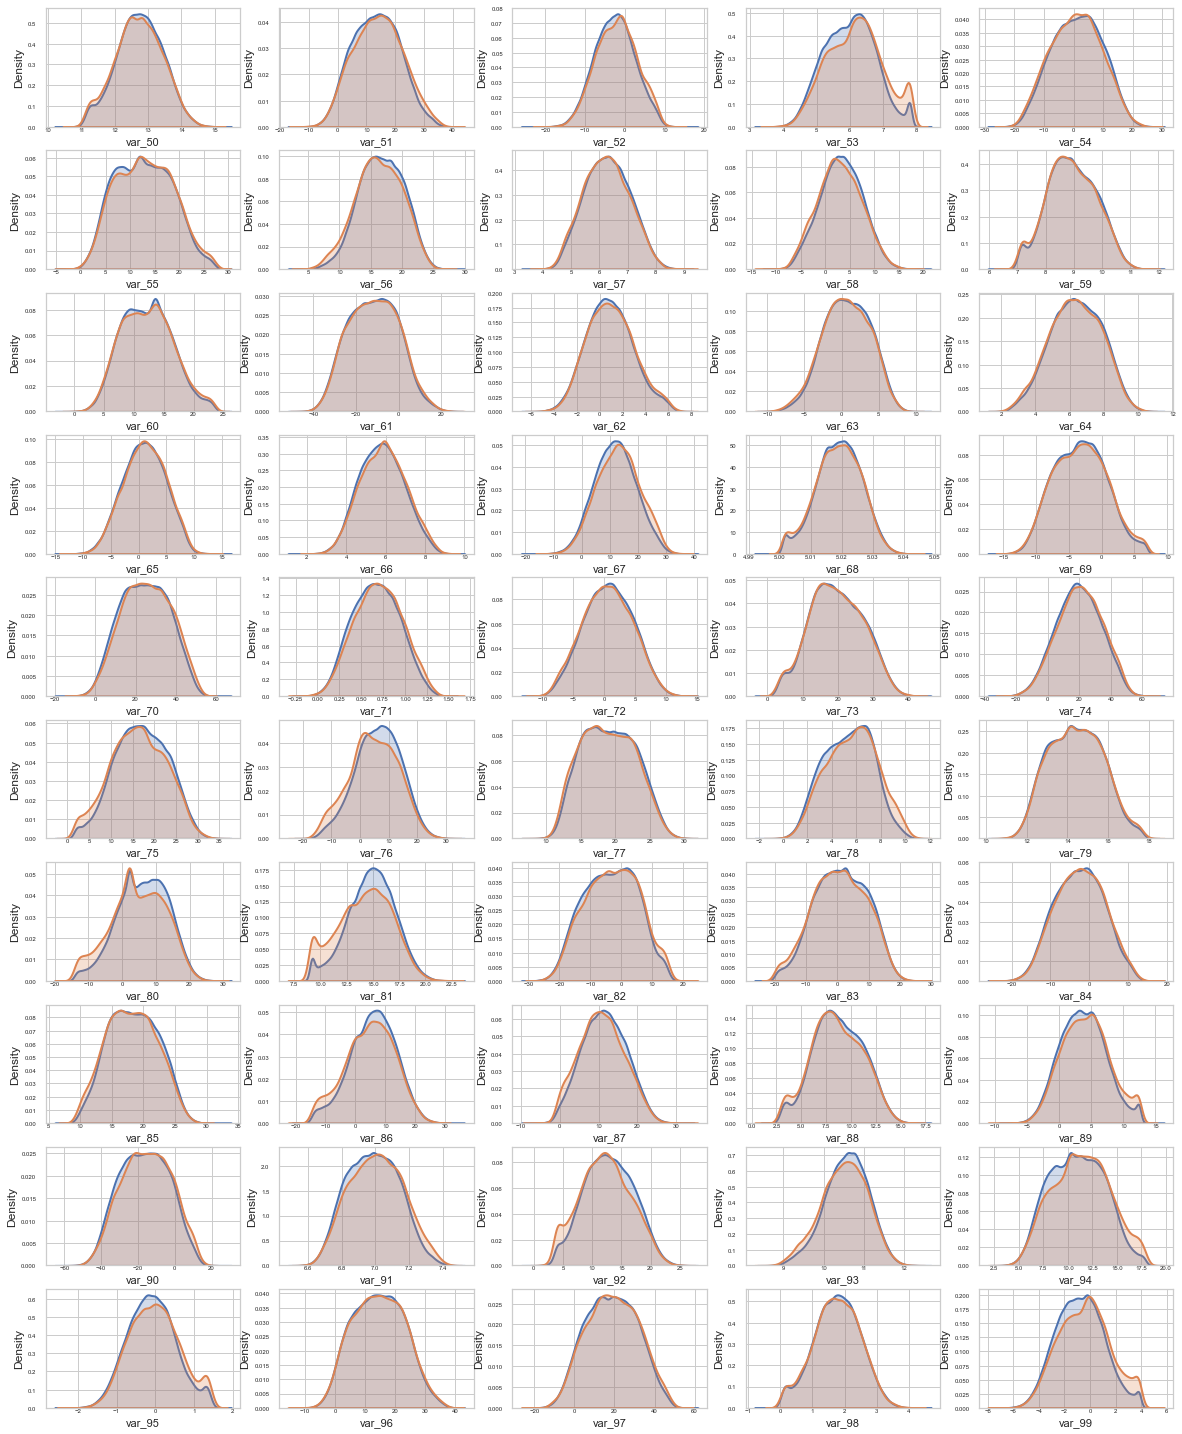

In [12]:
features = train.columns.values[52:102]
plot_feature_distribution(t0, t1, '0', '1', features)
#From var_50 to var_99


<Figure size 432x288 with 0 Axes>

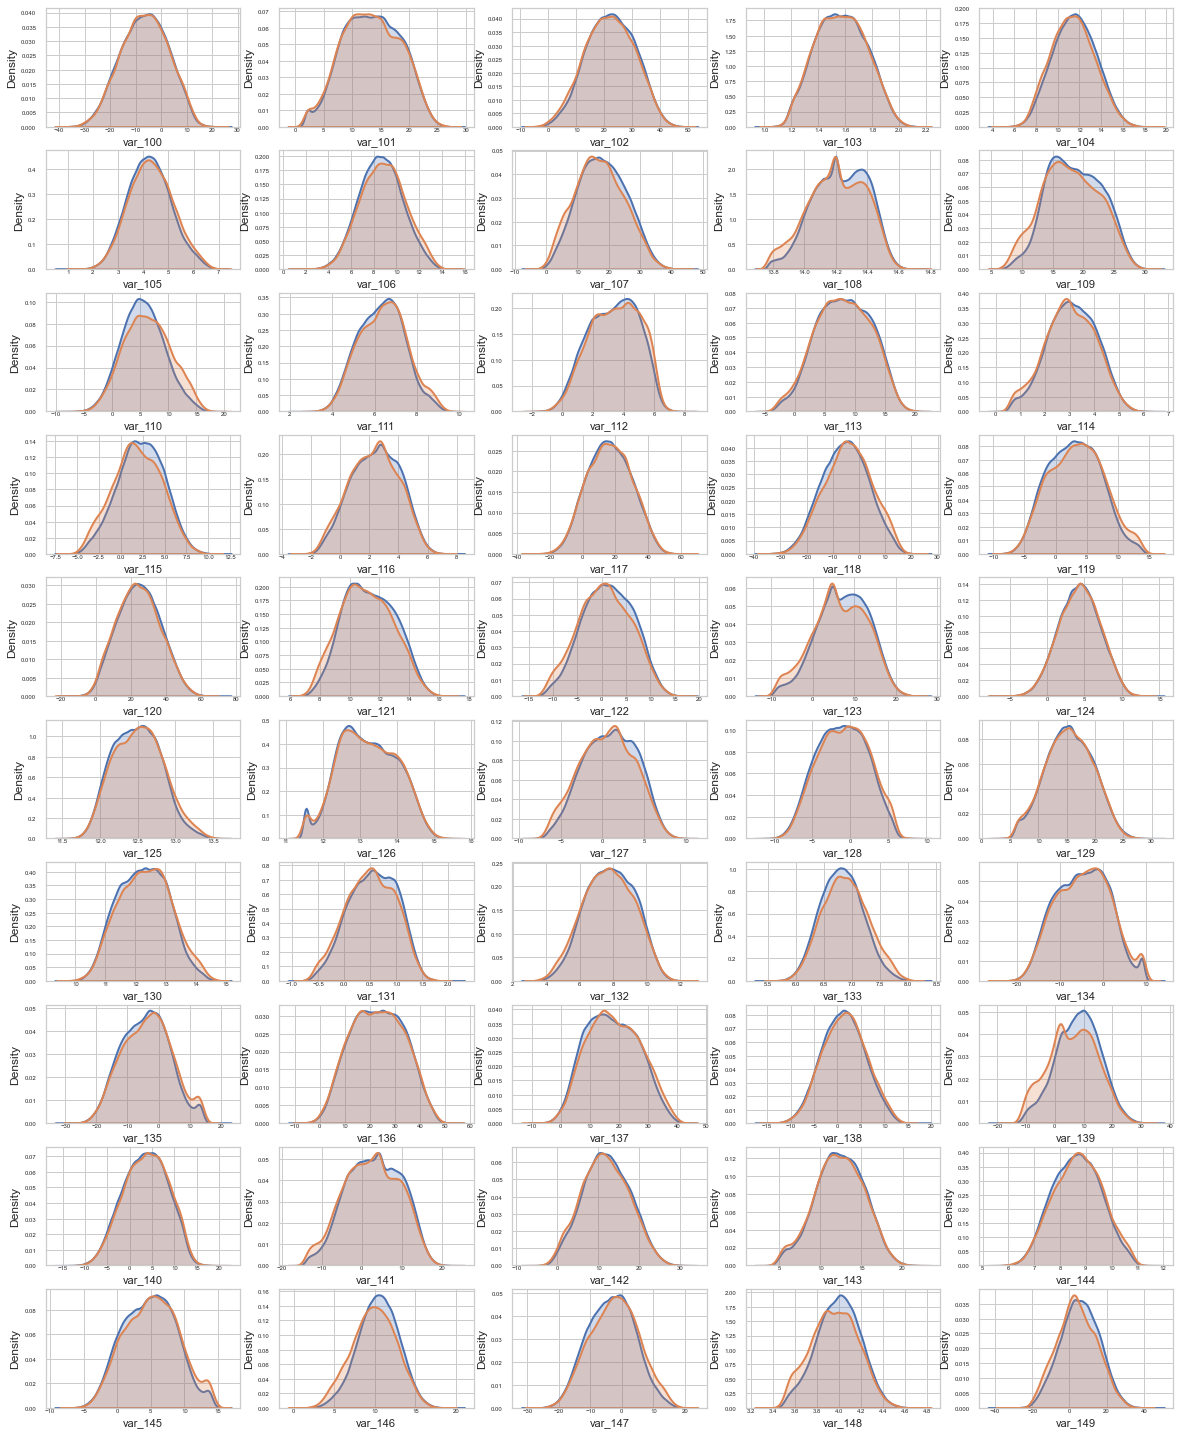

In [13]:
features = train.columns.values[102:152]
plot_feature_distribution(t0, t1, '0', '1', features)
#From var_100 to var_149


In [ ]:
features = train.columns.values[152:202]
plot_feature_distribution(t0, t1, '0', '1', features)
#From var_150 to var_199


<Figure size 432x288 with 0 Axes>

inference from the KDE plots above

* if we look closely var_2, var_9, var_12, var_13, var_26, var_40, var_53, var_81 and many others have resemblance of a dimodal type distribution.

*All of these variables have a bump of frequency that matches the rising of the probability of making a transaction.

*if pdf(target = 1) - pdf(target = 0) > 0, then there is a high probability of the client making a transfer.


DATA PREPROCESSING 


In [ ]:
import missingno as msno
%matplotlib inline
msno.matrix(train)
#msno.bar(train,log=True)


In [ ]:
# Missing Value Analysis
obs = train.isnull().sum().sort_values(ascending = False)
percent = round(train.isnull().sum().sort_values(ascending = False)/len(train)*100, 2)
pd.concat([obs, percent], axis = 1,keys= ['Number of Observations', 'Percent'])

# No missing values were found


In [ ]:
for col in train.columns[2:]:
    print("Number of unique values of {} : {}".format(col, train[col].nunique()))
    
#Most features have more than thousands of values for each variable except var_68 (451)


In [ ]:
train['var_68'].value_counts()


Let's check duplicate values for each feature
var_68, var_108,var_126 and var_12 were the top 4 features with max duplicate values


In [ ]:
features = train.columns.values[2:202]
unique_max_train = []
for feature in features:
    values = train[feature].value_counts()
    unique_max_train.append([feature, values.max(), values.idxmax()])


In [ ]:
np.transpose((pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicates', 'Value'])).
            sort_values(by = 'Max duplicates', ascending=False).head(15))


CORRELATION ANALYSIS


The features are independent and not correlated to each other


In [ ]:
train_corr = train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(train_corr)


In [ ]:
corr = train.corr()
abs(corr['target']).sort_values(ascending=False).head(30)


In [ ]:
correlations = train[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.tail(10)


OUTLIER ANALYSIS

In [ ]:
def plot_feature_boxplot(df, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,5,figsize=(18,24))

    for feature in features:
        i += 1
        plt.subplot(10,5,i)
        sns.boxplot(df[feature]) 
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', labelsize=6, pad=-6)
        plt.tick_params(axis='y', labelsize=6)
    plt.show()


In [ ]:
features = train.columns.values[2:52]
plot_feature_boxplot(train, features)
#From var_0 to var_49


In [ ]:
features = train.columns.values[52:102]
plot_feature_boxplot(train, features)
#From var_50 to var_99


In [ ]:
features = train.columns.values[102:152]
plot_feature_boxplot(train, features)
#From var_100 to var_149


In [ ]:
features = train.columns.values[152:202]
plot_feature_boxplot(train, features)
#From var_150 to var_199


In [ ]:
# Detect outliers from IQR
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


In [ ]:
print("df.shape:",train.shape)
df_in = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out = train[((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
print("df_in.shape:",df_in.shape)
print("df_out.shape:",df_out.shape)


In [ ]:
df_in['target'].value_counts()


In [ ]:
# comparing the 'train' and 'df_out' dataset,
# we can say that all the data points with target equals to 1 are present as outliers 
df_out['target'].value_counts()


In [ ]:
train['target'].value_counts()


In [ ]:
# replace outliers greater than Q3 and less than Q1
#Q1=Q1.drop(labels=['target'])
#Q3=Q3.drop(labels=['target'])

#for a in range (0,200):
    #df_out['var_'+str(a)]=df_out['var_'+str(a)].apply(lambda x: Q3['var_'+str(a)] if x > Q3['var_'+str(a)] else Q1['var_'+str(a)])
    
#train_df = df_in.append(df_out, ignore_index=True)


Principal component analysis (PCA)


PCA is a dimensionality reduction technique that reduces less-informative 'noise' features.

But PCA is sensitive to variance and different scales, so standardizing will help PCA perform better.

However, since we found that the correlation between different features in the training dataset is not that significant, so using PCA might not be meaningful.


In [ ]:
from sklearn.preprocessing import StandardScaler
standardized_train = StandardScaler().fit_transform(train.set_index(['ID_code','target']))


In [ ]:
standardized_train = pd.DataFrame(standardized_train, columns=train.set_index(['ID_code','target']).columns)
standardized_train = train[['ID_code','target']].join(standardized_train)


In [ ]:
from sklearn.decomposition import PCA
k=80
pca = PCA(n_components=k, random_state=42, whiten=True)
pca.fit(standardized_train.set_index(['ID_code','target']))


In [ ]:
pca.explained_variance_ratio_


In [ ]:
sum(pca.explained_variance_ratio_)


In [ ]:
plt.figure(figsize=(26,9))
plt.plot(pca.explained_variance_ratio_)
plt.xticks(range(k))
plt.xlabel("Number of Features")
plt.ylabel("Proportion of variance explained by additional feature")


Normally, if there is a elbow looking point in the graph above, the x value(number of features) of that point is usually the ideal number of components for PCA.


However in this case, each principal component explains very little of the total variance (e.g. first principal component only explains about 0.6% of the total variance).


Even when we sum up all the variance explained by the 80 principal components, it only amounts to 40%. Let's increase the k and see what happens


In [ ]:
sum(PCA(n_components=120, random_state=42, whiten=True).fit(standardized_train.set_index(['ID_code','target'])).\
explained_variance_ratio_)


In [ ]:
sum(PCA(n_components=170, random_state=42, whiten=True).fit(standardized_train.set_index(['ID_code','target'])).\
explained_variance_ratio_)


Even with using 170 principal components, 85% of the total variance is explained.

Hence we proved, that PCA is best when the dimension is very large and a lot of features are correlated to one another a lot.

FEATURE ENGINEERING


In [ ]:
#Created new columns with the unique values count
for feat in ['var_' + str(x) for x in range(200)]:
    train_count_values = train.groupby(feat)[feat].count()
    test_count_values = test.groupby(feat)[feat].count()
    train['new_' + feat] = train_count_values.loc[train[feat]].values
    test['new_' + feat] = test_count_values.loc[test[feat]].values


In [ ]:
train.head(3)


MODELLING

In [ ]:
Target = train['target']

# Input dataset for Train and Test 
train_inp = train.drop(columns = ['target', 'ID_code'])
test_inp = test.drop(columns = ['ID_code'])

# List of feature names
features = list(train_inp.columns)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_inp, Target, test_size= 0.3, random_state = 2019)


In [ ]:
# check the split of train and validation
print('Train:',X_train.shape)
print('Test:',X_test.shape)


LOGISTIC REGRESSION 

We start with most basic algorithm used for classification problems.

Since this is an unbalanced dataset, we need to define parameter 'class_weight = balanced' which will give equal weights to both the targets irrespective of their representation in the training dataset.


In [ ]:
steps = [('scaler', StandardScaler()),
        ('logreg', LogisticRegression(class_weight='balanced'))]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set
logreg_scaled = pipeline.fit(X_train,y_train)

y_pred = logreg_scaled.predict_proba(X_test)[:,1]



In [ ]:
## first make a model function for modeling with confusion matrix
def model(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train)
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    print("the precision for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1]))
    fig= plt.figure(figsize=(10,7))
    print("TP",cnf_matrix[1,1]) # no of true transactions which are predicted as true 
    print("TN",cnf_matrix[0,0]) # no of false transaction which are predicted as false 
    print("FP",cnf_matrix[0,1]) # no of false transactions which are predicted as true
    print("FN",cnf_matrix[1,0]) # no of true transactions which are predicted as false 
    sns.heatmap(cnf_matrix,cmap="Blues",annot=True,fmt="d",linewidths=1,linecolor='black')
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))



In [ ]:
model(logreg_scaled,X_train, X_test, y_train, y_test)


In [ ]:
from inspect import signature
from sklearn.metrics import average_precision_score,precision_recall_curve
def plot_precision_recall(y_test, y_pred): 
    precision, recall, _ = precision_recall_curve(y_test, y_pred)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(' Precision-Recall curve: PR_AUC={0:0.3f}'.format( auc(recall, precision)))
plot_precision_recall(y_test, y_pred)


In [ ]:
def plot_roc_curve(fpr, tpr):  
    fig= plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve: ROC_AUC={0:0.5f}'.format(roc_auc_score(y_test, y_pred)))
    plt.legend()
    plt.show()


DECISION TREES


Moving on to a slightly advanced algorithm, decision trees. Again, the parameters here are class_weight to deal with unbalanced target variable, random_state for reproducability of same trees. The feature max_features and min_sample_leaf are used to prune the tree and avoid overfitting to the training data.

Max_features defines what proportion of available input features will be used to create tree.

Min_sample_leaf restricts the minimum number of samples in a leaf node, making sure none of the leaf nodes has less than 80 samples in it. If leaf nodes have less samples it implies we have grown the tree too much and trying to predict each sample very precisely, thus leading to overfitting.



In [ ]:
tree_clf = DecisionTreeClassifier(class_weight='balanced', random_state = 2019, 
                                  max_features = 0.7, min_samples_leaf = 80)


In [ ]:
model(tree_clf,X_train, X_test, y_train, y_test)


In [ ]:
y_pred = tree_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)


In [ ]:
plot_precision_recall(y_test, y_pred)


In [ ]:
# Extract feature importances
feature_importance_values = tree_clf.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
feature_importances.sort_values(by='importance', ascending=False).head(n=10)


       ENSEMBLE LEARNING

Ensemble Learning refers to the algorithms that created using ensembles of variour learning algorithms. For example, random forests are ensembles of many decision tree estimators.

There are 2 types of ensemble learning algorithms

1.Bagging Algorithms: 
    Bagging involves having each model in the ensemble vote with equal weight for the final output. In order to promote model variance, bagging trains each model in the ensemble using a randomly drawn subset of the training set

2.Boosting Algorithms:
    Boosting involves incrementally building an ensemble by training each new model instance to emphasize the training instances that previous models mis-classified.

    RANDOM FOREST
    
Let's start with building a random forest, with parameters like class_weight, random_state, and hyperparameters like max_features and min_sample_leaf as earlier. We have also defined the n_estimators which is a compulsory parameter. This defines the number of decision trees that will be present in the forest.


In [ ]:
# Create random Forest Object using the mentioned parameters
random_forest = RandomForestClassifier(n_estimators=100, random_state=2019, verbose=1,
                                      class_weight='balanced', max_features = 0.5, 
                                       min_samples_leaf = 100)


In [ ]:
model(random_forest,X_train, X_test, y_train, y_test)


In [ ]:
y_pred = random_forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)


In [ ]:
plot_precision_recall(y_test, y_pred)


In [ ]:
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
feature_importances.sort_values(by='importance', ascending=False).head(n=10)


LIGHT GRADIENT BOOSTING METHOD 

WHAT IS IT?

Light GBM is a gradient boosting framework that uses tree based learning algorithm. It grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. Leaf-wise algorithm can reduce more loss than a level-wise algorithm.
WHY USE LGB?

It is ‘Light’ because of its high speed. It can handle large data, requires low memory to run and focuses on accuracy of results.
Ensemble of 200 LGB models

training model with 2 features at a time: The original one and an extra column with the unique values count.


In [ ]:
param = {
   'learning_rate': 0.05,
   'max_depth': 4,
   'num_leaves': 25,
   'feature_fraction': 1,
   'objective': 'binary',
   'boosting_type': 'gbdt',
   'verbosity': -1,
   'metric': 'auc',
   'is_unbalance': True
}

In [ ]:
seed = 2319
iterations = 130


features = [c for c in X_train.columns if (c not in ['ID_code', 'target'])]
feature_importance_df = pd.DataFrame()
test_size = 0.3

y_hat = np.zeros([int(200000*test_size), 200])

i = 0
for feature in ['var_' + str(x) for x in range(200)]: # loop over all features
    print(feature)
    feat_choices = [feature, 'new_' + feature]
    lgb_train = lgb.Dataset(X_train[feat_choices], y_train)
    gbm = lgb.train(param, lgb_train, iterations, verbose_eval=-1)
    y_hat[:, i] = gbm.predict(X_test[feat_choices], num_iteration=gbm.best_iteration)
    feature_importance_df= feature_importance_df.append({'feature' : feature, 
    'importance': gbm.feature_importance()} ,ignore_index=True)
    i += 1
    
y_pred = (y_hat).sum(axis=1)
score = roc_auc_score(y_test, y_pred)
print('Your roc_auc score is', score)  #0.8855


In [ ]:
#feature_importance_df['importance']=feature_importance_df['importance'].apply(lambda x : x[0])
cols = (feature_importance_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:20].index)
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(8,6))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)


In [ ]:
plot_precision_recall(y_test, y_pred)


hyperparameter tuning using BayesianOptimization¶


In [ ]:
from bayes_opt import BayesianOptimization


In [ ]:
X = X_train
y = y_train


def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=6,n_estimators=10000, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,num_leaves, bagging_fraction,lambda_l1,
                lambda_l2, min_gain_to_split,max_depth, bagging_freq, min_data_in_leaf,min_sum_hessian_in_leaf):
        params = {'application':'binary', 'metric':'auc','is_unbalance':True}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params["num_leaves"] = int(round(num_leaves))
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['feature_fraction'] = 1
        params['lambda_l1'] = max(min(lambda_l1, 1), 0)
        params['lambda_l2'] = max(min(lambda_l2, 2), 1)
        params['min_gain_to_split'] = max(min(min_gain_to_split, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['bagging_freq'] = int(round(bagging_freq))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, 
                    verbose_eval =200, metrics=['auc'])
        return max(cv_result['auc-mean'])
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.001, 0.01),
                                            'num_leaves': (20, 30),
                                            'bagging_fraction': (0.7, 1),
                                            'bagging_freq' : (2,5),
                                            'lambda_l1' : (0.7,1),
                                            'lambda_l2' : (1,2),
                                            'max_depth': (3,5),
                                            'min_data_in_leaf': (20, 25),
                                            'min_gain_to_split': (0.05,1),
                                            'min_sum_hessian_in_leaf':(15,20)
                                            }, random_state=200)
      
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round,acq='ucb', xi=0.0, alpha=1e-6)
    
    model_auc=[]
    for model in range(len( lgbBO.res)):
        model_auc.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_auc).idxmax()]['target'],lgbBO.res[pd.Series(model_auc).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(X, y, init_round=10, opt_round=10, n_folds=3, random_seed=6,n_estimators=10000)


In [ ]:
opt_params[1]["num_leaves"] = int(round(opt_params[1]["num_leaves"]))
opt_params[1]['max_depth'] = int(round(opt_params[1]['max_depth']))
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['bagging_freq'] = int(round(opt_params[1]['bagging_freq']))
opt_params[1]['objective']='binary'
opt_params[1]['metric']='auc'
opt_params[1]['is_unbalance']=True
opt_params[1]['boost_from_average']=False
opt_params=opt_params[1]
opt_params


In [ ]:
seed = 2319
iterations = 130

features = [c for c in X_train.columns if (c not in ['ID_code', 'target'])]
feature_importance_df = pd.DataFrame()
test_size = 0.3

y_hat = np.zeros([int(200000*test_size), 200])

i = 0
for feature in ['var_' + str(x) for x in range(200)]: # loop over all features
    #print(feature)
    feat_choices = [feature, 'new_' + feature]
    lgb_train = lgb.Dataset(X_train[feat_choices], y_train)
    gbm = lgb.train(opt_params, lgb_train, iterations, verbose_eval=-1)
    y_hat[:, i] = gbm.predict(X_test[feat_choices], num_iteration=gbm.best_iteration)
    feature_importance_df= feature_importance_df.append({'feature' : feature, 
    'importance': gbm.feature_importance()} ,ignore_index=True)
    i += 1
    
    
y_pred = (y_hat).sum(axis=1)
score = roc_auc_score(y_test, y_pred)
print('Your roc_auc score is', score)  #0.88644


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)


In [ ]:
plot_precision_recall(y_test, y_pred)


AutoML

In [ ]:
import h2o
print(h2o.__version__)
from h2o.automl import H2OAutoML


In [ ]:
#connect to a pre-existing cluster
h2o.init(max_mem_size='5G')
df=h2o.import_file(path="C:/Users/kiran/Desktop/python practice/Santander/train.csv")


In [ ]:
df.head(3)


In [ ]:
x = df.columns
y = 'target'

dropFeatures = ['ID_code','target']
for a in dropFeatures:
    x.remove(a)


In [ ]:
# For binary classification, response should be a factor
df[y] = df[y].asfactor()


In [ ]:
train,valid = df.split_frame(ratios = [.70], seed = 1234)


In [ ]:
aml = H2OAutoML(max_models=25, seed=47, max_runtime_secs=7200,max_runtime_secs_per_model=400)
aml.train(x=x, y=y, training_frame=train, validation_frame = valid)


In [ ]:
aml.leaderboard


In [ ]:
aml.leader


In [ ]:
aml.leaderboard[:5,"model_id"]


In [ ]:
m = h2o.get_model(aml.leaderboard[2,"model_id"])
m.varimp_plot()
